In [7]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
embedding_cols = ['tfidf_embedding', 'tfidf_ngrams', 'glove_embedding', 'w2v_embedding', 'bert_embedding']
feature_cols = ['gunning_fog', 'smog_index', 'subjectivity', 'title_text_similarity', 'words_per_sentence',
    'adv_ratio_title', 'noun_ratio_title', 'words_per_title', 'syllables_per_word',
    'uppercase_per_title', 'uppercase_ratio_title_text', 'adj_ratio_text', 'adv_ratio_text',
    'verb_ratio_text', 'noun_ratio_text', 'short_sentences_ratio', 'long_sentences_ratio']
target_col = 'label'
save_dir = "dt_results"
os.makedirs(save_dir, exist_ok=True)

In [9]:
def embedding_converter(x):
    if pd.isna(x) or x.strip() == '':
        return np.array([])
    x_clean = x.replace('\n', ' ').strip('[]')
    return np.fromstring(x_clean, sep=' ')

In [10]:
def load_data():
    df_train = pd.read_csv('train_embeddings.csv')
    df_val = pd.read_csv('val_embeddings.csv')
    df_test = pd.read_csv('test_embeddings.csv')

    for col in embedding_cols:
        for df in [df_train, df_val, df_test]:
            df[col] = df[col].apply(embedding_converter)

    return df_train, df_val, df_test

In [11]:
def evaluate_and_plot(model, X_test, y_test, title_prefix):
    y_pred = model.predict(X_test)
    print(f"\nAccuracy ({title_prefix}): {accuracy_score(y_test, y_pred):.4f}")
    print(f"\nClassification Report ({title_prefix}):")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"\nConfusion Matrix ({title_prefix}):")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix ({title_prefix})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    joblib.dump(model, f"{save_dir}/{title_prefix}_model.pkl")

In [12]:
df_train, df_val, df_test = load_data()

y_train = df_train[target_col].values
y_val = df_val[target_col].values
y_test = df_test[target_col].values

X_train_feat = df_train[feature_cols].values
X_val_feat = df_val[feature_cols].values
X_test_feat = df_test[feature_cols].values

C:\Users\holte\AppData\Local\Temp\ipykernel_20760\544128833.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(x_clean, sep=' ')



================== tfidf_embedding (doar embedding) ==================
Best max_depth (embedding only): 7 (val acc = 0.5588)

Accuracy (tfidf_embedding_only): 0.5550

Classification Report (tfidf_embedding_only):
              precision    recall  f1-score   support

           0     0.5574    0.9776    0.7100      6883
           1     0.4539    0.0234    0.0445      5471

    accuracy                         0.5550     12354
   macro avg     0.5057    0.5005    0.3772     12354
weighted avg     0.5116    0.5550    0.4153     12354


Confusion Matrix (tfidf_embedding_only):


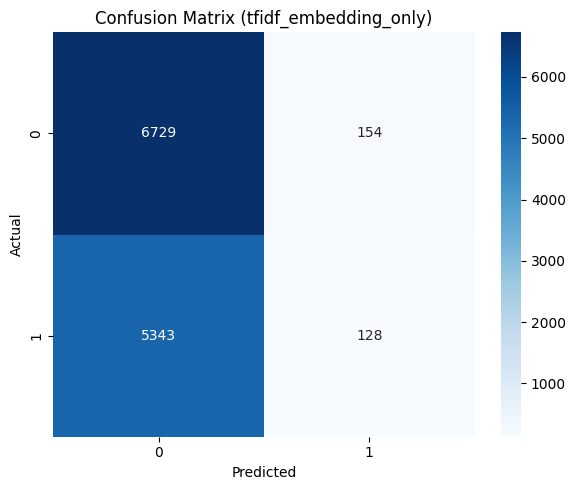


================== tfidf_embedding + features ==================
Best max_depth (with features): 13 (val acc = 0.8744)

Accuracy (tfidf_embedding_with_features): 0.8634

Classification Report (tfidf_embedding_with_features):
              precision    recall  f1-score   support

           0     0.8486    0.9188    0.8823      6883
           1     0.8860    0.7938    0.8374      5471

    accuracy                         0.8634     12354
   macro avg     0.8673    0.8563    0.8598     12354
weighted avg     0.8652    0.8634    0.8624     12354


Confusion Matrix (tfidf_embedding_with_features):


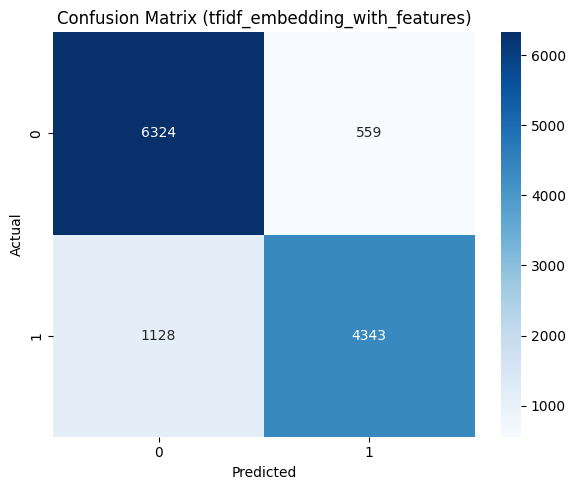


================== tfidf_ngrams (doar embedding) ==================
Best max_depth (embedding only): 4 (val acc = 0.5595)

Accuracy (tfidf_ngrams_only): 0.5591

Classification Report (tfidf_ngrams_only):
              precision    recall  f1-score   support

           0     0.5588    0.9908    0.7146      6883
           1     0.5800    0.0159    0.0310      5471

    accuracy                         0.5591     12354
   macro avg     0.5694    0.5034    0.3728     12354
weighted avg     0.5682    0.5591    0.4119     12354


Confusion Matrix (tfidf_ngrams_only):


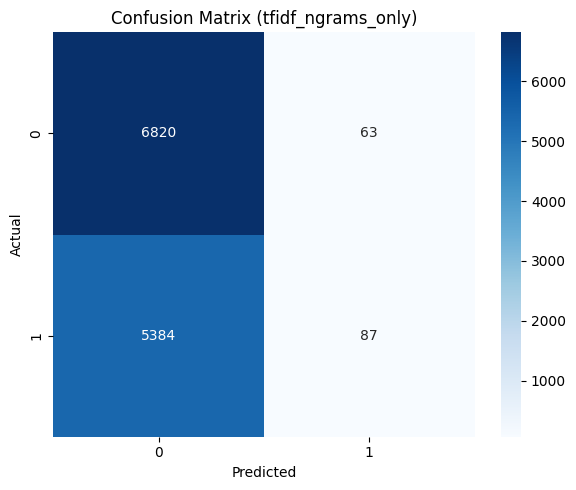


================== tfidf_ngrams + features ==================
Best max_depth (with features): 13 (val acc = 0.8754)

Accuracy (tfidf_ngrams_with_features): 0.8626

Classification Report (tfidf_ngrams_with_features):
              precision    recall  f1-score   support

           0     0.8470    0.9195    0.8818      6883
           1     0.8865    0.7911    0.8361      5471

    accuracy                         0.8626     12354
   macro avg     0.8668    0.8553    0.8589     12354
weighted avg     0.8645    0.8626    0.8615     12354


Confusion Matrix (tfidf_ngrams_with_features):


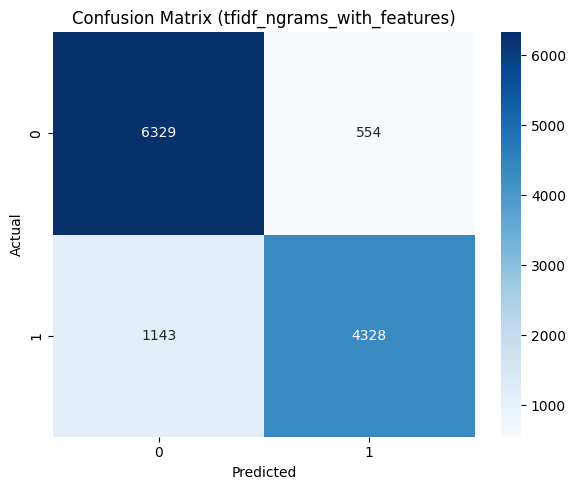


================== glove_embedding (doar embedding) ==================
Best max_depth (embedding only): 9 (val acc = 0.7768)

Accuracy (glove_embedding_only): 0.7698

Classification Report (glove_embedding_only):
              precision    recall  f1-score   support

           0     0.7889    0.8012    0.7950      6883
           1     0.7449    0.7302    0.7375      5471

    accuracy                         0.7698     12354
   macro avg     0.7669    0.7657    0.7663     12354
weighted avg     0.7694    0.7698    0.7695     12354


Confusion Matrix (glove_embedding_only):


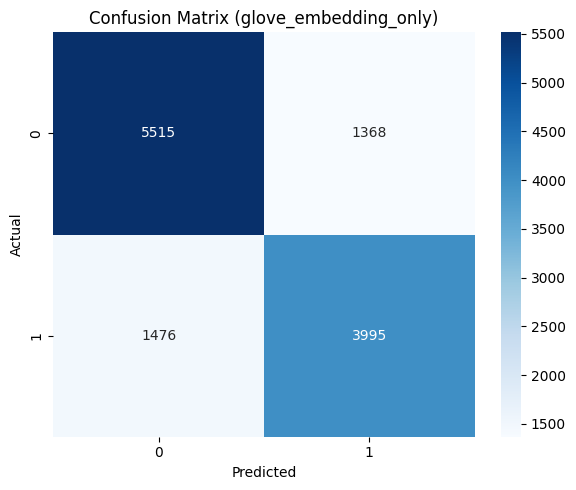


================== glove_embedding + features ==================
Best max_depth (with features): 8 (val acc = 0.8853)

Accuracy (glove_embedding_with_features): 0.8722

Classification Report (glove_embedding_with_features):
              precision    recall  f1-score   support

           0     0.8649    0.9133    0.8884      6883
           1     0.8826    0.8205    0.8504      5471

    accuracy                         0.8722     12354
   macro avg     0.8738    0.8669    0.8694     12354
weighted avg     0.8727    0.8722    0.8716     12354


Confusion Matrix (glove_embedding_with_features):


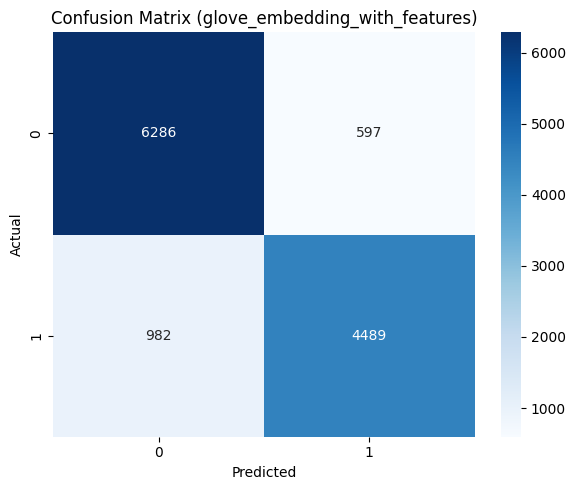


================== w2v_embedding (doar embedding) ==================
Best max_depth (embedding only): 10 (val acc = 0.8322)

Accuracy (w2v_embedding_only): 0.8275

Classification Report (w2v_embedding_only):
              precision    recall  f1-score   support

           0     0.8383    0.8554    0.8468      6883
           1     0.8133    0.7924    0.8027      5471

    accuracy                         0.8275     12354
   macro avg     0.8258    0.8239    0.8247     12354
weighted avg     0.8272    0.8275    0.8273     12354


Confusion Matrix (w2v_embedding_only):


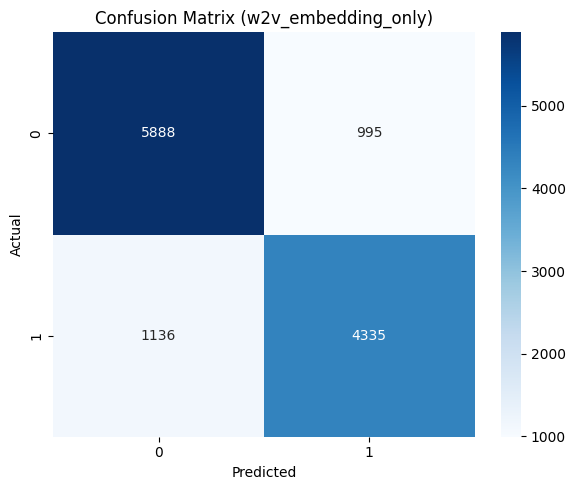


================== w2v_embedding + features ==================
Best max_depth (with features): 11 (val acc = 0.8980)

Accuracy (w2v_embedding_with_features): 0.8906

Classification Report (w2v_embedding_with_features):
              precision    recall  f1-score   support

           0     0.8889    0.9185    0.9035      6883
           1     0.8930    0.8556    0.8739      5471

    accuracy                         0.8906     12354
   macro avg     0.8909    0.8870    0.8887     12354
weighted avg     0.8907    0.8906    0.8904     12354


Confusion Matrix (w2v_embedding_with_features):


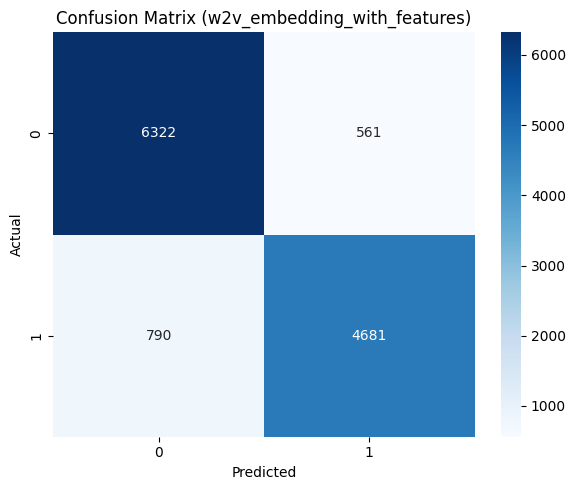


================== bert_embedding (doar embedding) ==================
Best max_depth (embedding only): 8 (val acc = 0.7918)

Accuracy (bert_embedding_only): 0.7744

Classification Report (bert_embedding_only):
              precision    recall  f1-score   support

           0     0.7931    0.8052    0.7991      6883
           1     0.7501    0.7357    0.7428      5471

    accuracy                         0.7744     12354
   macro avg     0.7716    0.7704    0.7710     12354
weighted avg     0.7740    0.7744    0.7742     12354


Confusion Matrix (bert_embedding_only):


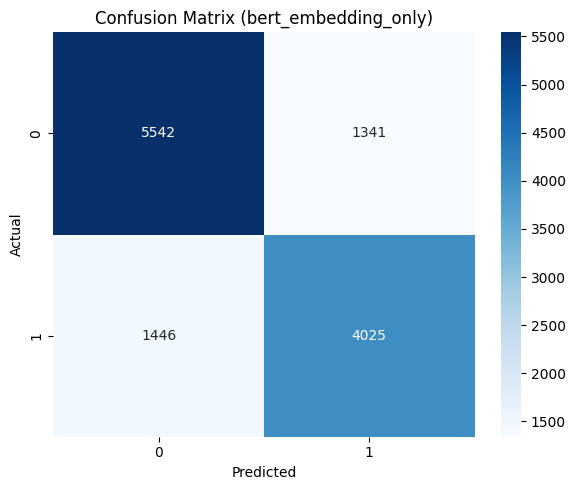


================== bert_embedding + features ==================
Best max_depth (with features): 10 (val acc = 0.8844)

Accuracy (bert_embedding_with_features): 0.8738

Classification Report (bert_embedding_with_features):
              precision    recall  f1-score   support

           0     0.8723    0.9061    0.8889      6883
           1     0.8759    0.8331    0.8540      5471

    accuracy                         0.8738     12354
   macro avg     0.8741    0.8696    0.8714     12354
weighted avg     0.8739    0.8738    0.8734     12354


Confusion Matrix (bert_embedding_with_features):


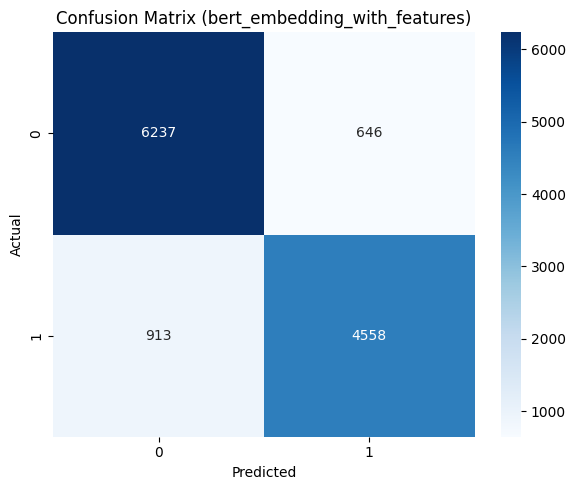

In [13]:
for col in embedding_cols:
    print(f"\n================== {col} (doar embedding) ==================")
    # Doar embedding
    X_train_emb = np.vstack(df_train[col].values)
    X_val_emb = np.vstack(df_val[col].values)
    X_test_emb = np.vstack(df_test[col].values)

    scaler_emb = StandardScaler()
    X_train_emb_std = scaler_emb.fit_transform(X_train_emb)
    X_val_emb_std = scaler_emb.transform(X_val_emb)
    X_test_emb_std = scaler_emb.transform(X_test_emb)

    # Tuning pe max_depth
    best_depth = None
    best_acc = 0
    for depth in range(3, 21):
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train_emb_std, y_train)
        acc = accuracy_score(y_val, model.predict(X_val_emb_std))
        if acc > best_acc:
            best_acc = acc
            best_depth = depth
    print(f"Best max_depth (embedding only): {best_depth} (val acc = {best_acc:.4f})")

    # Retrain + evaluate
    final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    final_model.fit(X_train_emb_std, y_train)
    evaluate_and_plot(final_model, X_test_emb_std, y_test, f"{col}_only")

    print(f"\n================== {col} + features ==================")
    # Cu features
    X_train_comb = np.hstack([X_train_feat, X_train_emb])
    X_val_comb = np.hstack([X_val_feat, X_val_emb])
    X_test_comb = np.hstack([X_test_feat, X_test_emb])

    scaler_comb = StandardScaler()
    X_train_comb_std = scaler_comb.fit_transform(X_train_comb)
    X_val_comb_std = scaler_comb.transform(X_val_comb)
    X_test_comb_std = scaler_comb.transform(X_test_comb)

    best_depth = None
    best_acc = 0
    for depth in range(3, 21):
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train_comb_std, y_train)
        acc = accuracy_score(y_val, model.predict(X_val_comb_std))
        if acc > best_acc:
            best_acc = acc
            best_depth = depth
    print(f"Best max_depth (with features): {best_depth} (val acc = {best_acc:.4f})")

    # Retrain + evaluate
    final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    final_model.fit(X_train_comb_std, y_train)
    evaluate_and_plot(final_model, X_test_comb_std, y_test, f"{col}_with_features")
